### 1. importación de librerías.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import datetime

import os
#print(os.listdir("../TFM"))

from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
# Any results you write to the current directory are saved as output.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 2. Carga de datos.

In [2]:
df = pd.read_csv(r'C:\Users\claud\Desktop\train_ver2.csv')

C:\Users\claud\AppData\Local\Temp\ipykernel_17120\1360358895.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\claud\Desktop\train_ver2.csv')


### 3. Análisis y limpieza del dataset.

In [3]:
df.shape

(13647309, 48)

In [4]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
# Número de registros únicos
uids = pd.Series(df['ncodpers'].unique())
uids.count()

956645

In [6]:
# Dataframe de registros únicos
df = df[df.ncodpers.isin(uids)]

In [7]:
# Check how many missing values in every column
df.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [8]:
# (axis=0) dirección vertical, (axis=1) dirección horizontal
# Se eliminan las columnas ult_fec_cli_1t y conyuemp (poseen casi todos los valores a NULL)
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [9]:
df.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_fin_ult1          int64
ind_ctpp_f

In [10]:
df['renta'].describe()

count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64

##### Se reemplazan los valores NULL de la columna "renta" por la renta media de los clientes de una PROVINCIA

### PRIMERA MANERA

In [11]:
# PRIMERA MANERA DE RELLENAR VALRORES PERDIDOS DE LA RENTA (MEDIANTE LA MEDIA DE LA RENTA POR PROVINCIA)
ucod_prov = df[df.cod_prov.notnull()].cod_prov.unique()
grouped = df.groupby("cod_prov").agg({"renta":lambda n: n.median(skipna=True)}).reset_index()

# se genera un nuevo dataset con dos columnas llamadas renta_x y renta_y correspondientes a la renta del left y renta del rigth
rentas_medias = pd.merge(df, grouped, how="inner", on="cod_prov")
rentas_medias = rentas_medias.loc[:, ["cod_prov","renta_y"]]

rentas_medias = rentas_medias.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("cod_prov")
df.sort_values("cod_prov",inplace=True)

df = df.reset_index()
rentas_medias = rentas_medias.reset_index()

# df.renta.isnull() --> Aquellos valores nulos de la columna "renta" del Dataframe df renta de df
# se van asignando los registros del dataframe rentas_medias, que poseen la media de la renta de esa PROVINCIA
# a las rentas que poseen un registro nulo del dataframe df
df.loc[df.renta.isnull(),"renta"] = rentas_medias.loc[df.renta.isnull(),"renta"].reset_index()

# Los registros faltanten del dataframe df al no poseer provincia  no se les puede asignar la renta media
# por lo que se calculará la mediana de la renta del dataframe df
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()

#df["fecha_dato"] = pd.to_numeric(df["fecha_dato"], errors="coerce") 
df.sort_values(by="fecha_dato",inplace=True)


In [12]:
# Se eliminan el resto de entradas que posean registros con valores perdidos
df = df.dropna(axis=0)

Text(0, 0.5, 'Número de clientes')

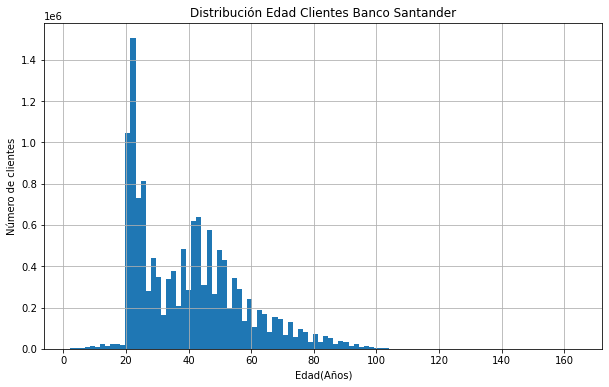

In [13]:
# Se cambian el tipo de dato del atributo age, se construye y pinta el histograma con la distribución de la edad de los clientes
df["age"] = pd.to_numeric(df["age"], errors="coerce") 
hist = df['age'].hist(bins=100)
plt.title("Distribución Edad Clientes Banco Santander")
plt.xlabel("Edad(Años)")
plt.ylabel("Número de clientes") 

<AxesSubplot:>

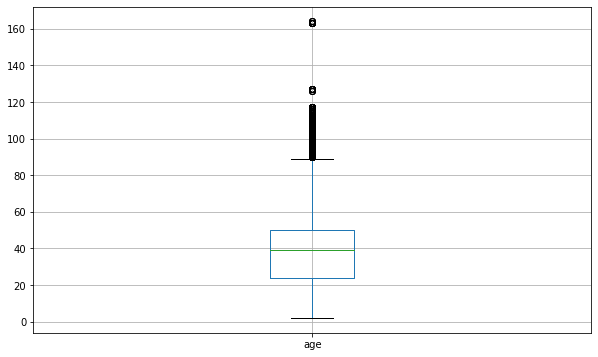

In [14]:
#  A partir del anterior histograma y la siguiente gráfica de cajas, se observa que los valores 
# por encima de 90 años de antiguedad se consideran atípicos, por lo que para el entrenamiento del 
# modelo de Regresión logística que se realizará posteriormente no se van a considerar, así que podemos 
# desecharlos.
df.boxplot(column =['age']) 

In [15]:
# Se crea una dummy column con los grupos de edad (7 grupos) y se elimina la columna age
# Aquellos valores superiores a 100 o inferiores a 0 no se consideran
ageGroup = [[0,18],[18,30],[30,45],[45,60],[60,70],[70,90],[90,100]]

def crear_ageGroup(dataset):  
    dataset['ageGroup'] = np.nan
    for x,ageN in enumerate(ageGroup):
        registro_fila = (dataset['age'] >= ageN[0]) & (dataset['age'] < ageN[1])
        dataset.loc[registro_fila,'ageGroup'] = x
        
crear_ageGroup(df)

df.drop('age', axis=1, inplace = True)

In [16]:
df["antiguedad"] = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["antiguedad"].describe()

count    1.339120e+07
mean     7.707170e+01
std      1.685976e+03
min     -9.999990e+05
25%      2.300000e+01
50%      5.100000e+01
75%      1.360000e+02
max      2.560000e+02
Name: antiguedad, dtype: float64

In [17]:
df[df['antiguedad']<0] = 0

In [18]:
df = df[df['antiguedad'] >= 0]
df = df[df["antiguedad"] < 100] 
df["antiguedad"].describe()

count    8.498288e+06
mean     3.485873e+01
std      2.485023e+01
min      0.000000e+00
25%      1.500000e+01
50%      3.100000e+01
75%      4.700000e+01
max      9.900000e+01
Name: antiguedad, dtype: float64

In [19]:
# Se crea una dummy column con los grupos de edad (7 grupos) y se elimina la columna age
# Aquellos valores superiores a 100 o inferiores a 0 no se consideran
rentaGroup = [[0,30000],[30000,50000],[50000,80000],[80000,110000],[110000,160000],[160000,220000],[220000,1200000],[1200000,29000000]]

def create_rentaGroup(dataset):  
    dataset['renta_group'] = np.nan
    for x,rentaN in enumerate(rentaGroup):
        registro_fila = (dataset['renta'] >= rentaN[0]) & (dataset['renta'] < rentaN[1])
        dataset.loc[registro_fila,'renta_group'] = x
        
create_rentaGroup(df)

df.drop('renta', axis=1, inplace = True)

In [20]:
# Se observa que la mayoría de los clientes son de España
df['pais_residencia'].describe() 

count     8498288
unique          2
top            ES
freq      8498250
Name: pais_residencia, dtype: object

In [21]:
# Se excluyen aquellas entradas de clientes cuyo país no sea España
df = df.loc[lambda df: df.pais_residencia == "ES", :]

In [22]:
# Se eliminan las columnas consideradas irrelevantes a la hora de entrenar el Modelo LogisticRegression
# ind_nuevo --> es irrelevante
# indrel    --> es irrelevante
# indresi   --> es irrelevante
# indfall   --> es irrelevante
# tipodom   --> es irrelevante
# nomprov   --> ya existe codprov (código numérico de cada provincia)

# pais_residencia --> solo existe ES (España), es irrelevante
# indrel_1mes     --> es irrelevante
# indext          --> es irrelevante
# fecha_alta      --> es irrelevante
# tiprel_1mes     --> es irrelevante

drop_column = ['ind_nuevo','indrel','indresi','indfall','tipodom','nomprov','ind_empleado','pais_residencia','indrel_1mes','indext','fecha_alta','tiprel_1mes']
df.drop(drop_column, axis=1, inplace = True)

In [23]:
# not in use
replace_mapping = {
                  "sexo": {"V":0,'H':1},
                  }

df.replace(replace_mapping, inplace= True)

In [24]:
# These column are categories feature, I'll transform them using get_dummy
dummy_col = ['sexo','canal_entrada','cod_prov','segmento']

In [25]:
limit = int(0.05 * len(df.index))

for col in dummy_col:
    if len(df[col].unique()) > 6:
        trainlist = df[col].value_counts()
        print(trainlist)
        use_col = []
        for i,item in enumerate(trainlist):
            if item > limit:
                use_col.append(df[col].value_counts().index[i])  
        for item in df[col].unique(): 
            if item not in use_col:
                row_index = df[col] == item
                df.loc[row_index,col] = np.nan

KHE    4050963
KFC    1511631
KAT     953933
KHQ     591034
KHK     240951
        ...   
KEN          8
KHS          5
KCG          4
KDL          3
KHR          1
Name: canal_entrada, Length: 86, dtype: int64
28.0    2010889
8.0      803367
46.0     443231
41.0     410365
30.0     347769
15.0     345046
29.0     265372
36.0     230912
3.0      222294
11.0     219435
50.0     205381
33.0     188598
47.0     167732
6.0      166469
35.0     165223
45.0     134187
37.0     133992
18.0     130071
10.0     112956
14.0     110238
21.0     105330
39.0     101286
13.0      94974
2.0       93876
12.0      79809
7.0       78811
48.0      78023
27.0      72487
32.0      72463
9.0       71857
17.0      67589
43.0      66633
25.0      61661
24.0      59616
26.0      52917
31.0      49712
16.0      48661
49.0      42786
23.0      42658
4.0       42528
38.0      40852
34.0      39007
19.0      38515
20.0      37634
5.0       29110
22.0      28751
40.0      28701
1.0       20575
44.0      18231
42.0 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8498250 entries, 2679130 to 3111285
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   fecha_dato             object 
 2   ncodpers               int64  
 3   sexo                   int64  
 4   antiguedad             int64  
 5   canal_entrada          object 
 6   cod_prov               float64
 7   ind_actividad_cliente  float64
 8   segmento               object 
 9   ind_ahor_fin_ult1      int64  
 10  ind_aval_fin_ult1      int64  
 11  ind_cco_fin_ult1       int64  
 12  ind_cder_fin_ult1      int64  
 13  ind_cno_fin_ult1       int64  
 14  ind_ctju_fin_ult1      int64  
 15  ind_ctma_fin_ult1      int64  
 16  ind_ctop_fin_ult1      int64  
 17  ind_ctpp_fin_ult1      int64  
 18  ind_deco_fin_ult1      int64  
 19  ind_deme_fin_ult1      int64  
 20  ind_dela_fin_ult1      int64  
 21  ind_ecue_fin_ult1      int64  
 22  ind_fond_fin

In [27]:
df.info

<bound method DataFrame.info of             index  fecha_dato  ncodpers  sexo  antiguedad canal_entrada  \
2679130    201558  2015-01-28   1343714     1           9           KHE   
1908491    163283  2015-01-28   1286584     0          12           KHE   
8201652     87343  2015-01-28    930266     1          47           KFC   
1908494    163280  2015-01-28   1286581     0          12           KHE   
2768936    175162  2015-01-28   1303196     0          10           KFC   
...           ...         ...       ...   ...         ...           ...   
3111339  13282634  2016-05-28   1330247     0          19           KFC   
3111345  13282697  2016-05-28   1330458     0          19           KFC   
3111349  13282712  2016-05-28   1330442     0          19           KFC   
3111359  13282505  2016-05-28   1331659     0          19           KFC   
3111285  13282217  2016-05-28   1332181     1          19           KHE   

         cod_prov  ind_actividad_cliente            segmento  \
267

In [28]:
df.head()

,index,fecha_dato,ncodpers,sexo,antiguedad,canal_entrada,cod_prov,ind_actividad_cliente,segmento,ind_ahor_fin_ult1,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,ageGroup,renta_group
2679130,201558,2015-01-28,1343714,1,9,KHE,NaN,0.0,03 - UNIVERSITARIO,0,...,0,0,0,0,0,0.0,0.0,0,1.0,1.0
1908491,163283,2015-01-28,1286584,0,12,KHE,8.0,0.0,03 - UNIVERSITARIO,0,...,0,0,0,0,0,0.0,0.0,0,1.0,4.0
8201652,87343,2015-01-28,930266,1,47,KFC,28.0,0.0,03 - UNIVERSITARIO,0,...,0,0,0,0,0,0.0,0.0,0,1.0,3.0
1908494,163280,2015-01-28,1286581,0,12,KHE,8.0,0.0,03 - UNIVERSITARIO,0,...,0,0,0,0,0,0.0,0.0,0,1.0,5.0
2768936,175162,2015-01-28,1303196,0,10,KFC,NaN,1.0,02 - PARTICULARES,0,...,0,0,0,0,0,0.0,0.0,0,2.0,1.0


In [29]:
df = pd.get_dummies(df, prefix=dummy_col, columns = dummy_col)

In [30]:
df

,index,fecha_dato,ncodpers,antiguedad,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,...,canal_entrada_KAT,canal_entrada_KFC,canal_entrada_KHE,canal_entrada_KHQ,cod_prov_8.0,cod_prov_28.0,cod_prov_46.0,segmento_01 - TOP,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO
2679130,201558,2015-01-28,1343714,9,0.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1908491,163283,2015-01-28,1286584,12,0.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
8201652,87343,2015-01-28,930266,47,0.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1908494,163280,2015-01-28,1286581,12,0.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2768936,175162,2015-01-28,1303196,10,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111339,13282634,2016-05-28,1330247,19,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3111345,13282697,2016-05-28,1330458,19,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3111349,13282712,2016-05-28,1330442,19,1.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3111359,13282505,2016-05-28,1331659,19,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8498250 entries, 2679130 to 3111285
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   index                        int64  
 1   fecha_dato                   object 
 2   ncodpers                     int64  
 3   antiguedad                   int64  
 4   ind_actividad_cliente        float64
 5   ind_ahor_fin_ult1            int64  
 6   ind_aval_fin_ult1            int64  
 7   ind_cco_fin_ult1             int64  
 8   ind_cder_fin_ult1            int64  
 9   ind_cno_fin_ult1             int64  
 10  ind_ctju_fin_ult1            int64  
 11  ind_ctma_fin_ult1            int64  
 12  ind_ctop_fin_ult1            int64  
 13  ind_ctpp_fin_ult1            int64  
 14  ind_deco_fin_ult1            int64  
 15  ind_deme_fin_ult1            int64  
 16  ind_dela_fin_ult1            int64  
 17  ind_ecue_fin_ult1            int64  
 18  ind_fond_fin_ult1            int64  

In [32]:
df.to_csv('DF_TRAIN_CLEAN.csv', index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8498250 entries, 2679130 to 3111285
Data columns (total 43 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   index                        int64  
 1   fecha_dato                   object 
 2   ncodpers                     int64  
 3   antiguedad                   int64  
 4   ind_actividad_cliente        float64
 5   ind_ahor_fin_ult1            int64  
 6   ind_aval_fin_ult1            int64  
 7   ind_cco_fin_ult1             int64  
 8   ind_cder_fin_ult1            int64  
 9   ind_cno_fin_ult1             int64  
 10  ind_ctju_fin_ult1            int64  
 11  ind_ctma_fin_ult1            int64  
 12  ind_ctop_fin_ult1            int64  
 13  ind_ctpp_fin_ult1            int64  
 14  ind_deco_fin_ult1            int64  
 15  ind_deme_fin_ult1            int64  
 16  ind_dela_fin_ult1            int64  
 17  ind_ecue_fin_ult1            int64  
 18  ind_fond_fin_ult1            int64  

In [34]:
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

### SE DIVIDEN LOS DATOS EN TRAIN Y TEST (80% TRAIN Y 20% TEST)

In [35]:
# Todas las columnas (atributos tras la limpieza del dataset)
col_atributos = [
    'fecha_dato','ncodpers','antiguedad','ind_actividad_cliente','ageGroup','renta_group','sexo_0','sexo_1','canal_entrada_KAT',
    'canal_entrada_KFC','canal_entrada_KHE','canal_entrada_KHE','canal_entrada_KHQ','cod_prov_8.0','cod_prov_28.0','cod_prov_46.0',
    'segmento_01 - TOP','segmento_02 - PARTICULARES','segmento_03 - UNIVERSITARIO'
]

# Todas las columnas (clases a prededir)
col_productos = [
 'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']

In [36]:
df[col_productos].sum()

ind_ahor_fin_ult1          0.0
ind_aval_fin_ult1         53.0
ind_cco_fin_ult1     6095575.0
ind_cder_fin_ult1        872.0
ind_cno_fin_ult1      503041.0
ind_ctju_fin_ult1      58782.0
ind_ctma_fin_ult1     125599.0
ind_ctop_fin_ult1      33248.0
ind_ctpp_fin_ult1     263120.0
ind_deco_fin_ult1      17843.0
ind_deme_fin_ult1       4866.0
ind_dela_fin_ult1     229685.0
ind_ecue_fin_ult1     515254.0
ind_fond_fin_ult1      50437.0
ind_hip_fin_ult1        1417.0
ind_plan_fin_ult1      14554.0
ind_pres_fin_ult1       8181.0
ind_reca_fin_ult1     205665.0
ind_tjcr_fin_ult1     165339.0
ind_valo_fin_ult1      63295.0
ind_viv_fin_ult1        2592.0
ind_nomina_ult1       318507.0
ind_nom_pens_ult1     339217.0
ind_recibo_ult1       840098.0
dtype: float64

In [37]:
# No se cvva a tratar la columna ind_ahor_fin_ult1 debido a que todos sus valores son 0.0
col_productos = [
 'ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']

In [38]:
X = df[col_atributos].values

In [39]:
X

array([['2015-01-28', 1343714, 9, ..., 0, 0, 1],
       ['2015-01-28', 1286584, 12, ..., 0, 0, 1],
       ['2015-01-28', 930266, 47, ..., 0, 0, 1],
       ...,
       ['2016-05-28', 1330442, 19, ..., 0, 1, 0],
       ['2016-05-28', 1331659, 19, ..., 0, 1, 0],
       ['2016-05-28', 1332181, 19, ..., 0, 0, 1]], dtype=object)

In [40]:
Y = df[col_productos].values

In [41]:
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [42]:
## Dividimos el dataset en 80% de datos para entrenamiento y 20% de datos para testeo.
# values = df.values
# X = values[:,1:22]
# Y = values[:,0]
x_train, x_test, y_trains, y_tests = train_test_split(X, Y, test_size=0.20, random_state=1234, shuffle = True )

In [43]:
# i = xxxx
# columna = [fila[i] for fila in y_tests]

In [44]:
x_train

array([['2016-03-28', 973152, 52, ..., 0, 0, 1],
       ['2015-10-28', 1347133, 12, ..., 0, 0, 1],
       ['2016-02-28', 1308841, 17, ..., 0, 1, 0],
       ...,
       ['2015-10-28', 1106988, 35, ..., 0, 0, 1],
       ['2016-03-28', 933102, 55, ..., 0, 0, 1],
       ['2015-02-28', 1229283, 19, ..., 0, 0, 1]], dtype=object)

In [45]:
y_trains

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [46]:
columna_y_train = [fila[0] for fila in y_trains]
np.sum(columna_y_train)

42.0

In [47]:
x_test2 = np.delete(x_test,[0,1],1)
x_test2

array([[21, 0.0, 1.0, ..., 0, 0, 1],
       [45, 0.0, 1.0, ..., 0, 0, 1],
       [73, 1.0, 3.0, ..., 0, 1, 0],
       ...,
       [93, 0.0, 3.0, ..., 0, 1, 0],
       [21, 0.0, 2.0, ..., 0, 1, 0],
       [35, 0.0, 1.0, ..., 0, 0, 1]], dtype=object)

In [48]:
x_test

array([['2015-01-28', 1201634, 21, ..., 0, 0, 1],
       ['2015-06-28', 960236, 45, ..., 0, 0, 1],
       ['2015-07-28', 844367, 73, ..., 0, 1, 0],
       ...,
       ['2015-08-28', 733435, 93, ..., 0, 1, 0],
       ['2015-10-28', 1239209, 21, ..., 0, 1, 0],
       ['2015-01-28', 1046559, 35, ..., 0, 0, 1]], dtype=object)

In [49]:
# Se obtienen los registros de la columna ncodpers que será la segunda columna de las y_tests
codigo_persona = [fila[1] for fila in x_test]
codigo_persona

[1201634,
 960236,
 844367,
 986125,
 994257,
 1253171,
 962561,
 1074071,
 1369442,
 1311861,
 1037336,
 1188113,
 1179533,
 1025613,
 1439606,
 1142468,
 1222109,
 1382540,
 1300628,
 881927,
 1440711,
 1123079,
 1222401,
 1230783,
 1104260,
 894987,
 1389489,
 1197022,
 1368431,
 1381649,
 1007538,
 1188684,
 1394663,
 1144412,
 1353877,
 1494001,
 1203443,
 1302678,
 1058699,
 980677,
 1349876,
 1148632,
 1191845,
 1357325,
 1195642,
 996346,
 1078738,
 1328261,
 1258900,
 1033956,
 1090725,
 1482318,
 804978,
 1252674,
 1187642,
 1283055,
 850446,
 951348,
 1285671,
 1218186,
 858481,
 1405566,
 1189976,
 1208556,
 1214319,
 962431,
 948330,
 1360669,
 1289296,
 1268294,
 856608,
 830538,
 1381743,
 1323410,
 1426919,
 958558,
 1211029,
 965479,
 732049,
 1082064,
 1166284,
 1153141,
 1444329,
 928167,
 1309871,
 472496,
 978103,
 1139739,
 1105858,
 824427,
 858134,
 1399043,
 1067741,
 414783,
 1099875,
 1045553,
 1329975,
 1180636,
 1261741,
 1241176,
 1478543,
 1271007,
 90566

### SE ENTRENAN los MODELOS LogisticRegression() y se predice

In [50]:
from sklearn.ensemble import RandomForestClassifier

modelos = {}
modelos_preds = {}
modelos_prob= {}

id_preds = defaultdict(list)
ids = codigo_persona

# Modelo con x_train & columna i d y_trains
for i in range(23):
    
    # Entrenar modelo con los datos de train

    columna_y_train = [fila[i] for fila in y_trains]
    # Se eliminan las dos primeras columnas (ncodpers y fecha_data), ya que no serán necesarios para entrenar el modelo 
    x_train2 = np.delete(x_train,[0,1],1) 
    print(col_productos[i])
    #print(x_train2)
    
    #modelo = LogisticRegression(max_iter=1000)
    modelo = RandomForestClassifier(n_estimators=10, random_state=101)
    modelo.fit(x_train2, columna_y_train)
    
    # Predecir con los datos de test
    x_test2 = np.delete(x_test,[0,1],1)
    #print(x_test2)
    preds_test = modelo.predict(x_test2)
    prob_test= modelo.predict_proba(x_test2)[:,1]
    
    modelos[col_productos[i]] = modelo
    modelos_preds[col_productos[i]] = preds_test
    modelos_prob[col_productos[i]] = prob_test
    for id, p in zip(ids, prob_test):
        id_preds[id].append(p)



ind_aval_fin_ult1
ind_cco_fin_ult1
ind_cder_fin_ult1
ind_cno_fin_ult1
ind_ctju_fin_ult1
ind_ctma_fin_ult1
ind_ctop_fin_ult1
ind_ctpp_fin_ult1
ind_deco_fin_ult1
ind_deme_fin_ult1
ind_dela_fin_ult1
ind_ecue_fin_ult1
ind_fond_fin_ult1
ind_hip_fin_ult1
ind_plan_fin_ult1
ind_pres_fin_ult1
ind_reca_fin_ult1
ind_tjcr_fin_ult1
ind_valo_fin_ult1
ind_viv_fin_ult1
ind_nomina_ult1
ind_nom_pens_ult1
ind_recibo_ult1


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef
for i in range(len(col_productos)):
    # Se obtiene la clase 
    columna_y_test = [fila[i] for fila in y_tests]
    
    print("Métricas para la clase" + col_productos[i] )
    
    print('ACC : %.3f' % accuracy_score(columna_y_test, modelos_preds[col_productos[i]]))
    print('Precision  : %.3f' %  precision_score(columna_y_test, modelos_preds[col_productos[i]]))
    print('Recall : %.3f' % recall_score(columna_y_test, modelos_preds[col_productos[i]]))
    print('BACC : %.3f' % balanced_accuracy_score(columna_y_test, modelos_preds[col_productos[i]]))
    print('F1-Score : %.3f' % f1_score(columna_y_test, modelos_preds[col_productos[i]]))
    print('AUC-ROC : %.3f' % roc_auc_score(columna_y_test, modelos_prob[col_productos[i]]))
   # print('MCC : %.3f' % matthews_corrcoef(columna_y_test, modelos_prob[col_productos[i]]))

Métricas para la claseind_aval_fin_ult1
ACC : 1.000
Precision  : 0.250
Recall : 0.091
BACC : 0.545
F1-Score : 0.133
AUC-ROC : 0.636
Métricas para la claseind_cco_fin_ult1
ACC : 0.806
Precision  : 0.828
Recall : 0.921
BACC : 0.718
F1-Score : 0.872
AUC-ROC : 0.822
Métricas para la claseind_cder_fin_ult1
ACC : 1.000
Precision  : 0.773
Recall : 0.108
BACC : 0.554
F1-Score : 0.189
AUC-ROC : 0.775
Métricas para la claseind_cno_fin_ult1
ACC : 0.942
Precision  : 0.545
Recall : 0.105
BACC : 0.550
F1-Score : 0.175
AUC-ROC : 0.879
Métricas para la claseind_ctju_fin_ult1
ACC : 0.999
Precision  : 0.949
Recall : 0.905
BACC : 0.952
F1-Score : 0.926
AUC-ROC : 0.986
Métricas para la claseind_ctma_fin_ult1
ACC : 0.986
Precision  : 0.569
Recall : 0.228
BACC : 0.613
F1-Score : 0.326
AUC-ROC : 0.948
Métricas para la claseind_ctop_fin_ult1
ACC : 0.996
Precision  : 0.584
Recall : 0.113
BACC : 0.557
F1-Score : 0.190
AUC-ROC : 0.904
Métricas para la claseind_ctpp_fin_ult1
ACC : 0.973
Precision  : 0.598
Recall 

Curva ROC para la claseind_aval_fin_ult1
Curva ROC para la claseind_cco_fin_ult1
Curva ROC para la claseind_cder_fin_ult1
Curva ROC para la claseind_cno_fin_ult1
Curva ROC para la claseind_ctju_fin_ult1
Curva ROC para la claseind_ctma_fin_ult1
Curva ROC para la claseind_ctop_fin_ult1
Curva ROC para la claseind_ctpp_fin_ult1
Curva ROC para la claseind_deco_fin_ult1
Curva ROC para la claseind_deme_fin_ult1
Curva ROC para la claseind_dela_fin_ult1
Curva ROC para la claseind_ecue_fin_ult1
Curva ROC para la claseind_fond_fin_ult1
Curva ROC para la claseind_hip_fin_ult1
Curva ROC para la claseind_plan_fin_ult1
Curva ROC para la claseind_pres_fin_ult1
Curva ROC para la claseind_reca_fin_ult1
Curva ROC para la claseind_tjcr_fin_ult1
Curva ROC para la claseind_valo_fin_ult1
Curva ROC para la claseind_viv_fin_ult1
Curva ROC para la claseind_nomina_ult1


C:\Users\claud\AppData\Local\Temp\ipykernel_17120\1239206577.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10)) # Init figure


Curva ROC para la claseind_nom_pens_ult1
Curva ROC para la claseind_recibo_ult1


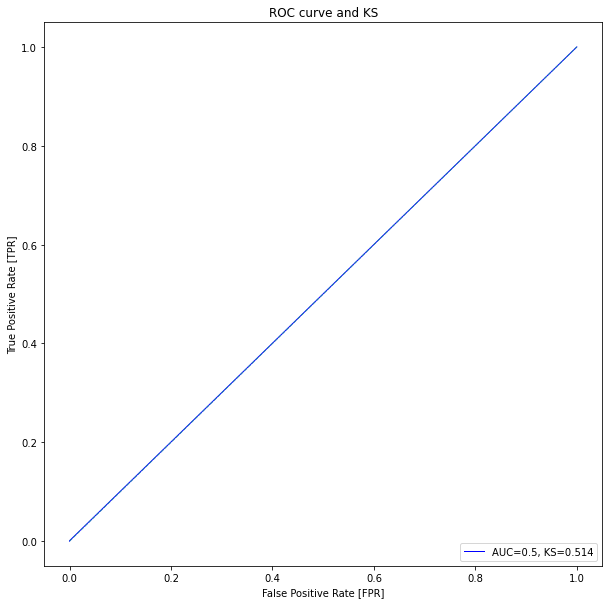

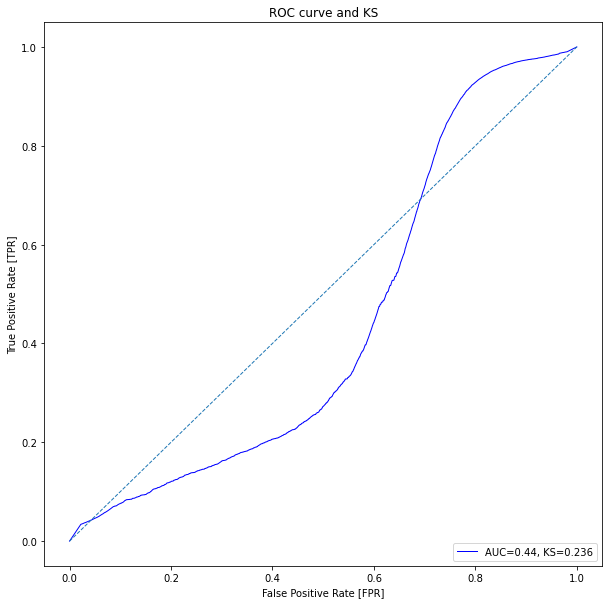

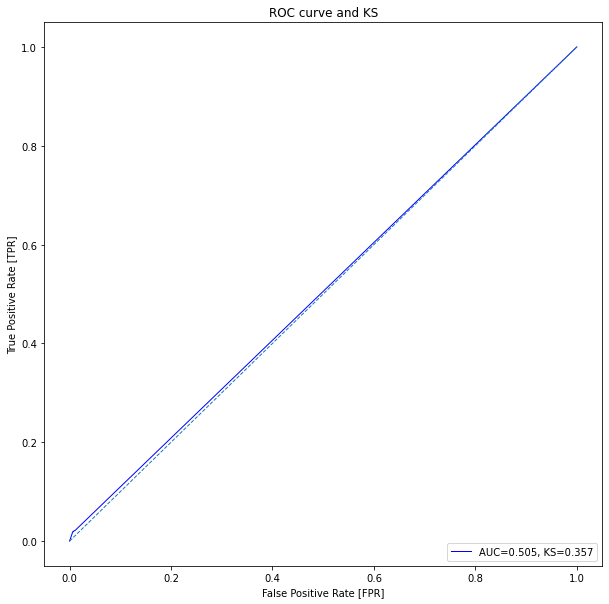

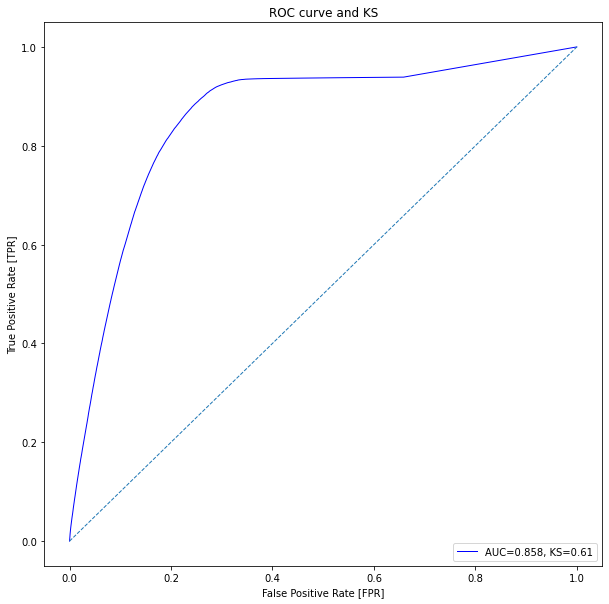

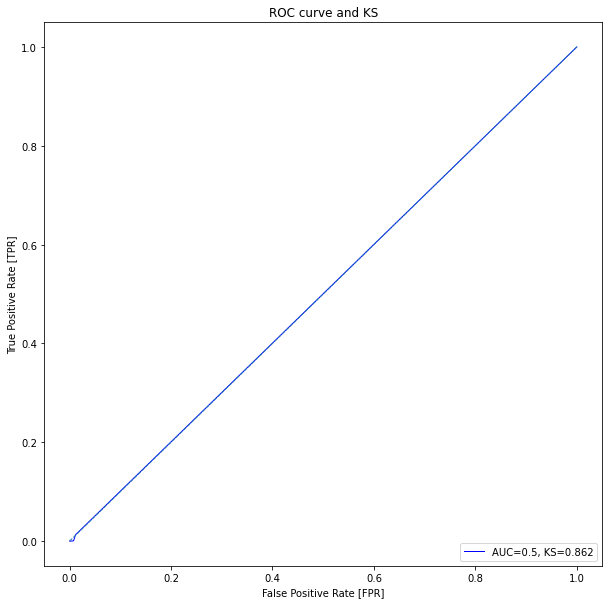

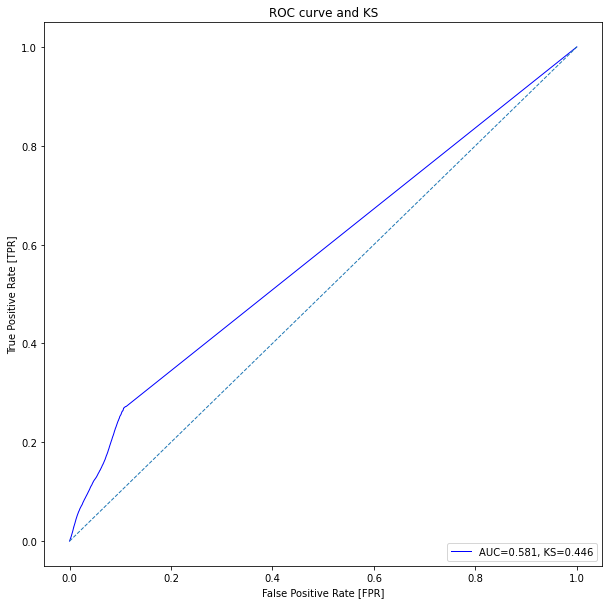

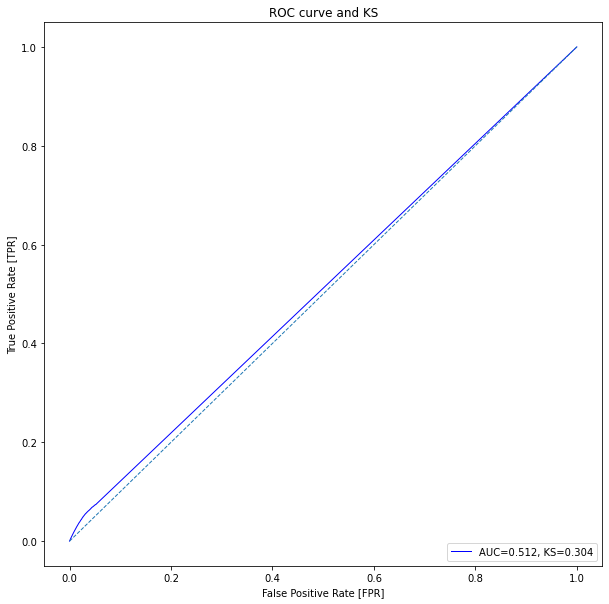

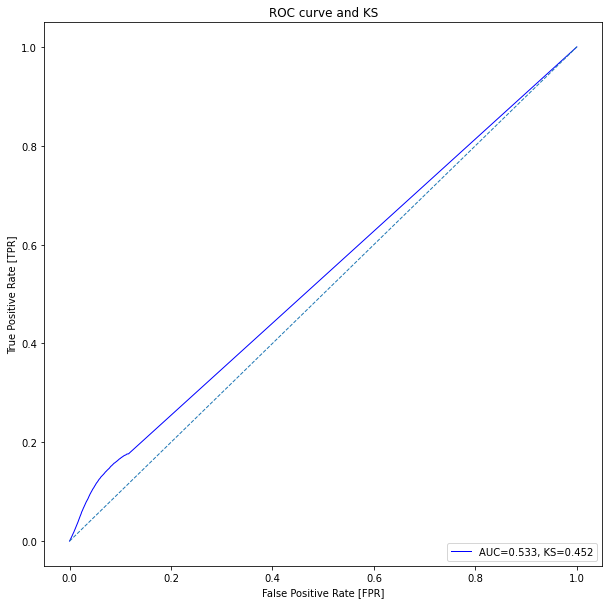

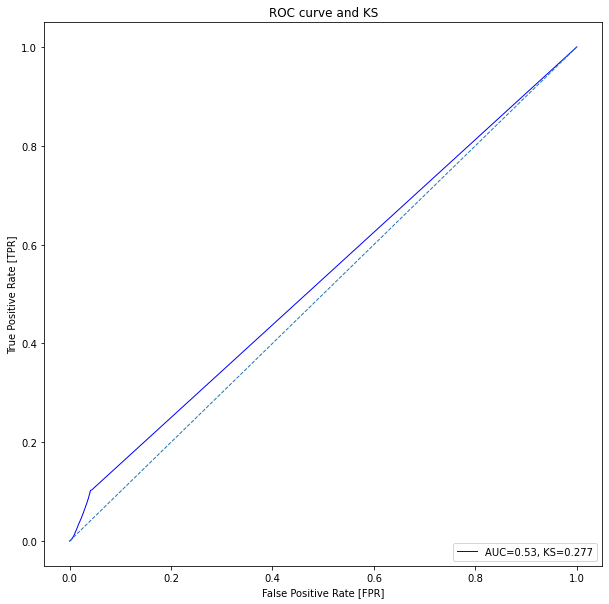

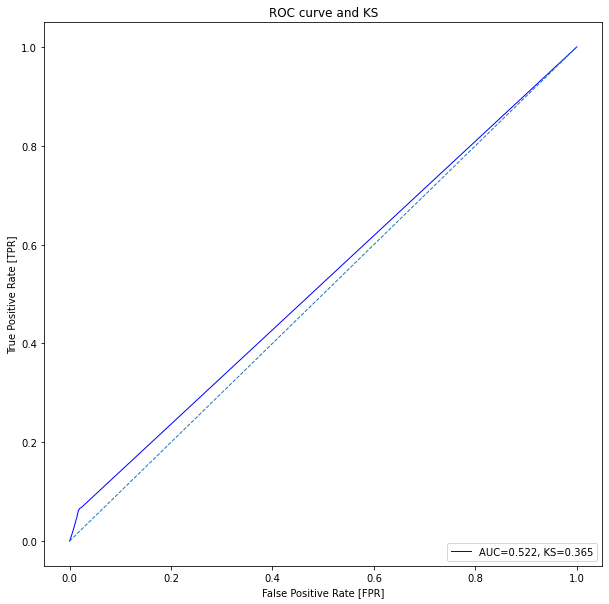

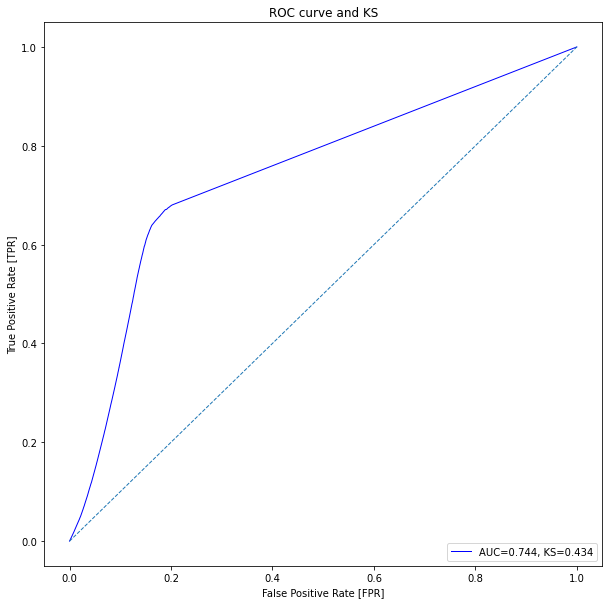

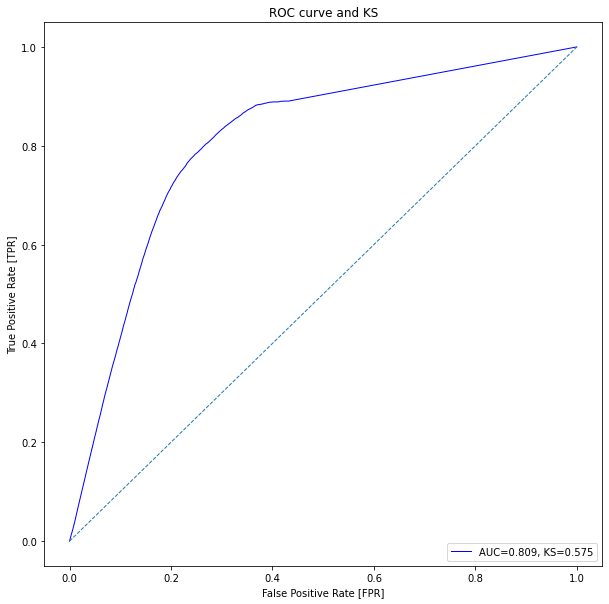

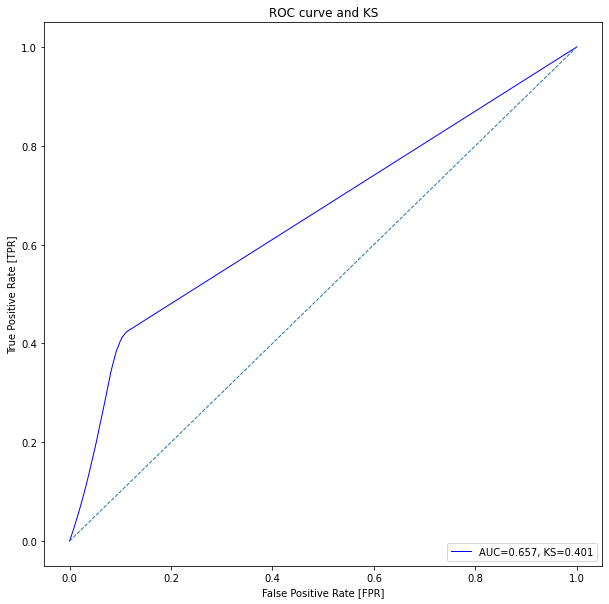

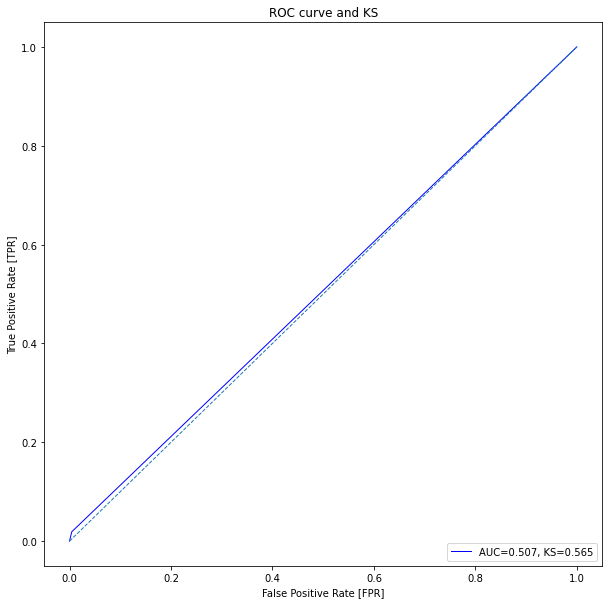

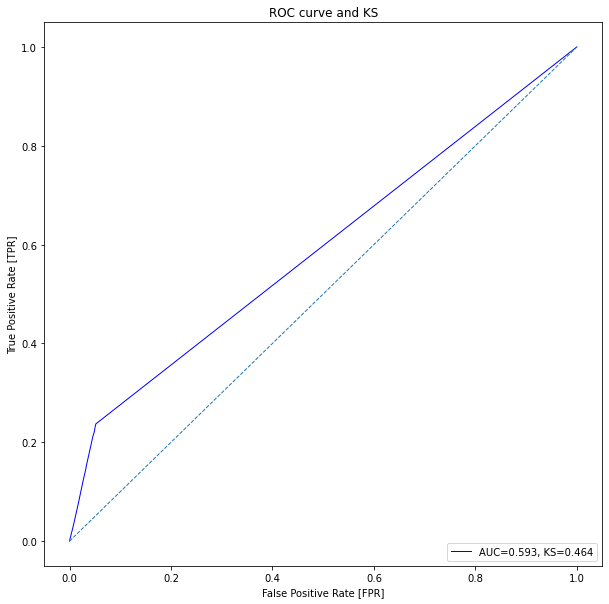

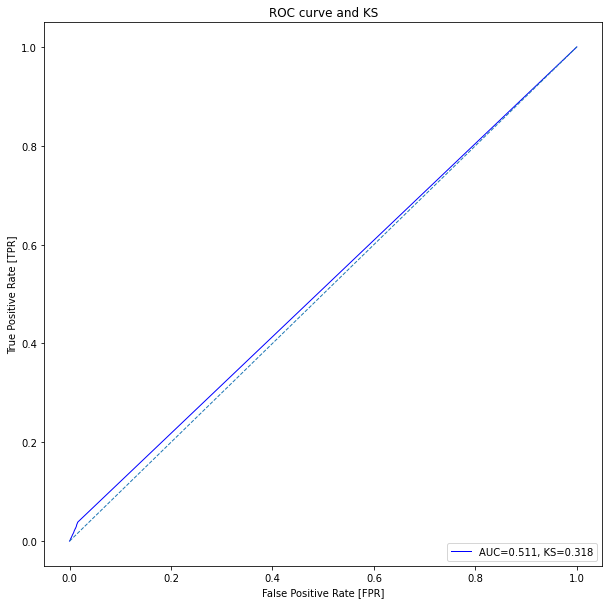

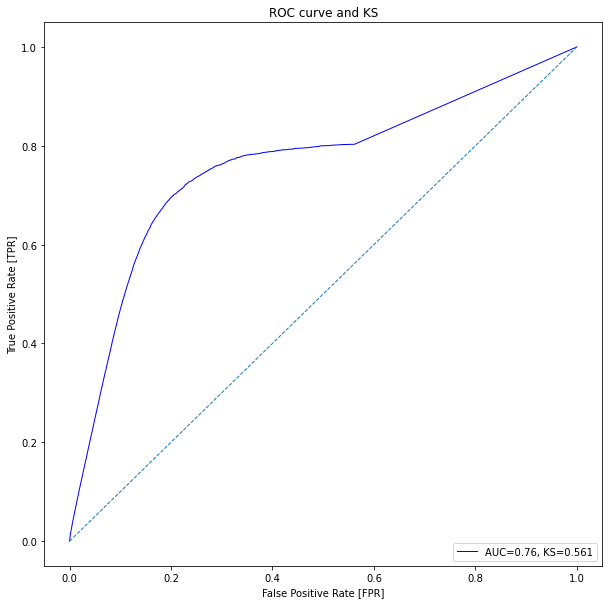

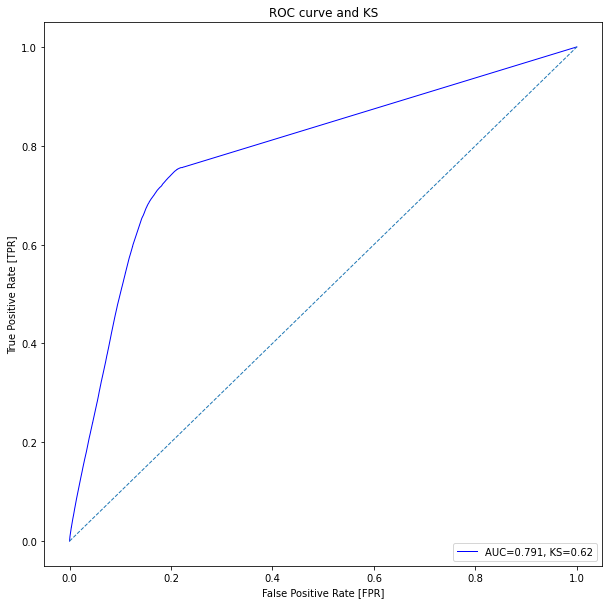

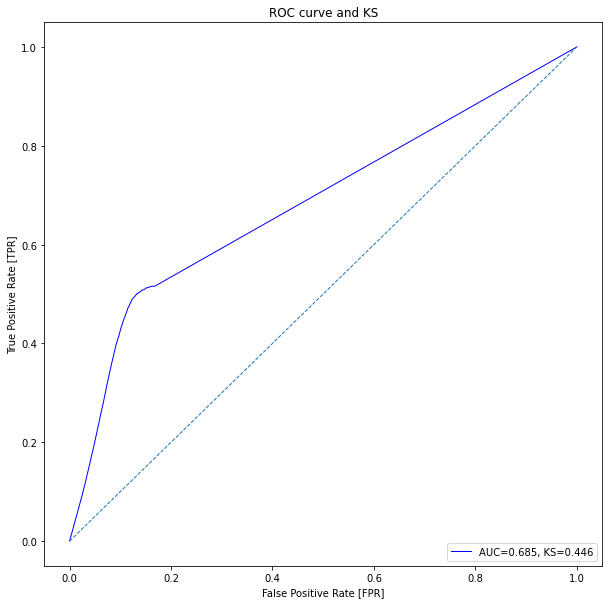

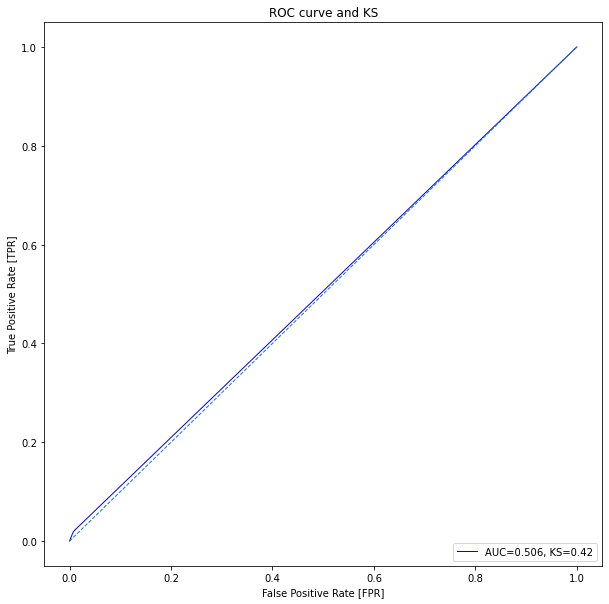

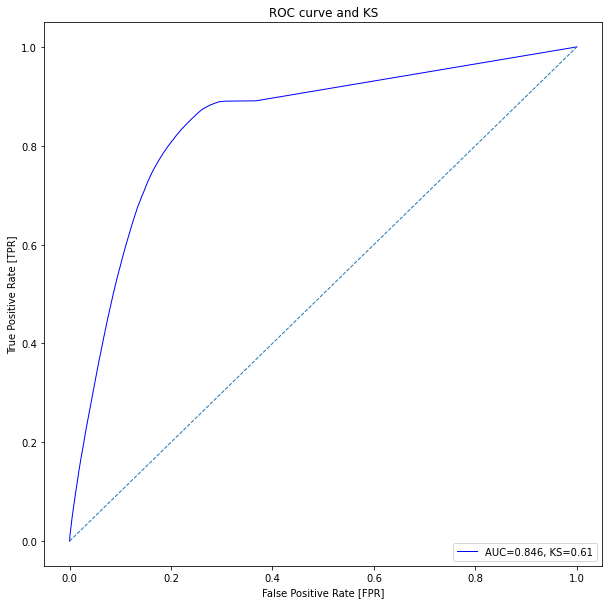

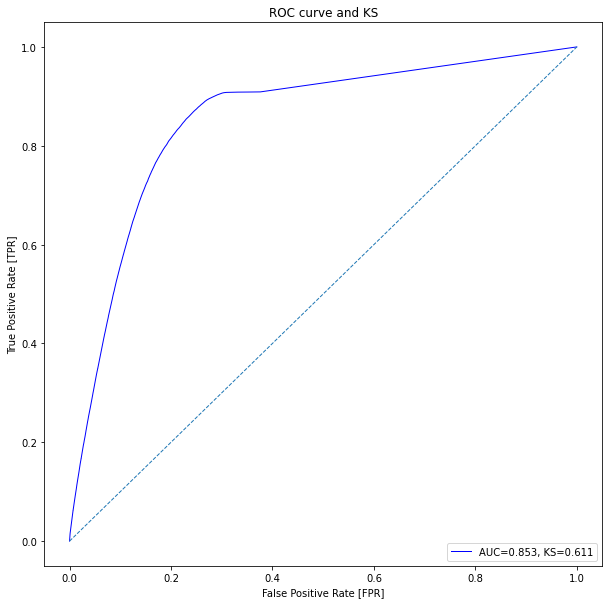

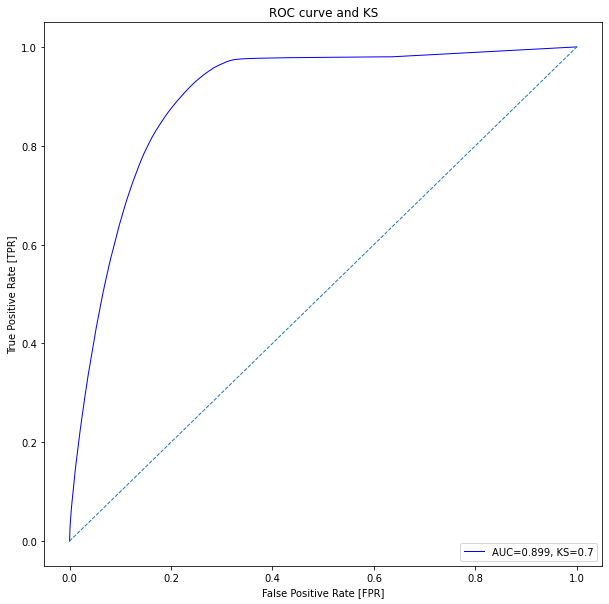

In [54]:

import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# prob_test = model.predict_proba(X_test)[:,1]
for i in range(len(col_productos)):
    print("Curva ROC para la clase" + col_productos[i] )     
    fpr, tpr, threshold = roc_curve(columna_y_test, modelos_prob[col_productos[i]])
    roc_auc = round(auc(fpr, tpr),3)
    KS= round(ks_2samp(fpr, tpr)[0],3) 

    fig = plt.figure(figsize=(10,10)) # Init figure
    plt.plot(fpr, tpr, 'b', linewidth=1, label="AUC="+str(roc_auc)+", KS="+str(KS)) # Plot ROC Curve
    plt.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), linewidth=1,linestyle='dashed') # Plot dashed guess line
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate [FPR]')
    plt.ylabel('True Positive Rate [TPR]')
    plt.title('ROC curve and KS')   

Matriz de confusion para la claseind_aval_fin_ult1


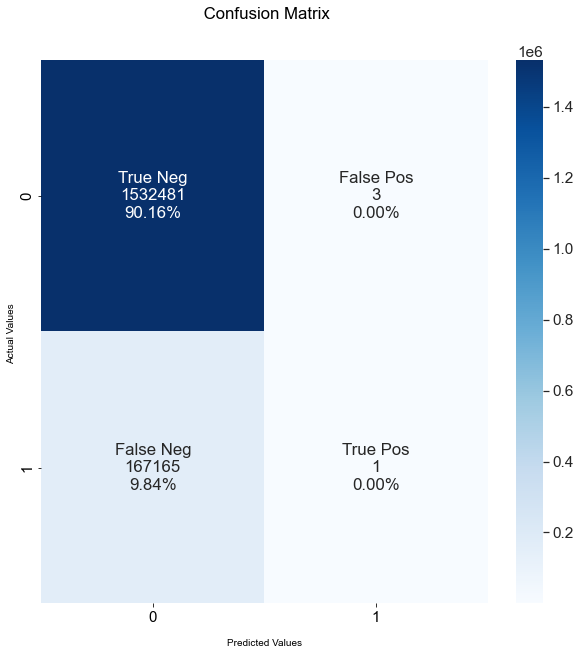

Matriz de confusion para la claseind_cco_fin_ult1


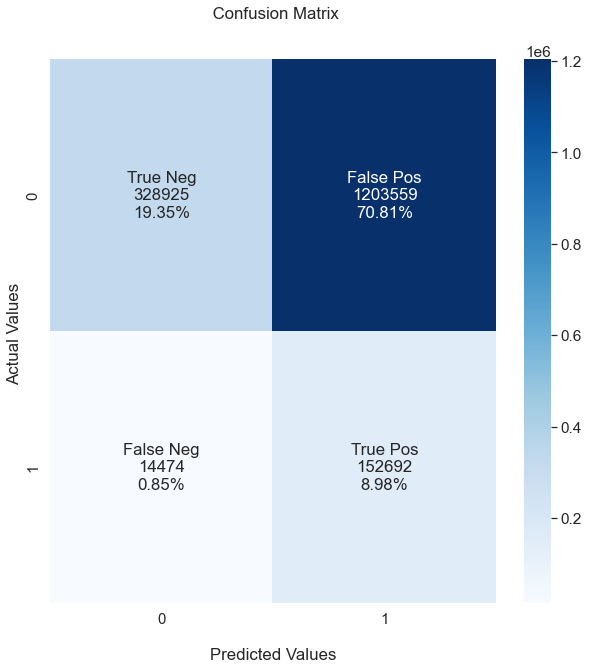

Matriz de confusion para la claseind_cder_fin_ult1


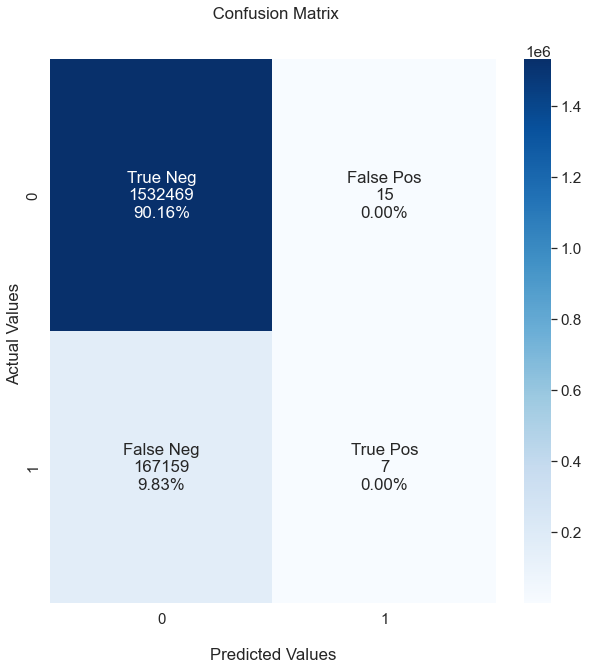

Matriz de confusion para la claseind_cno_fin_ult1


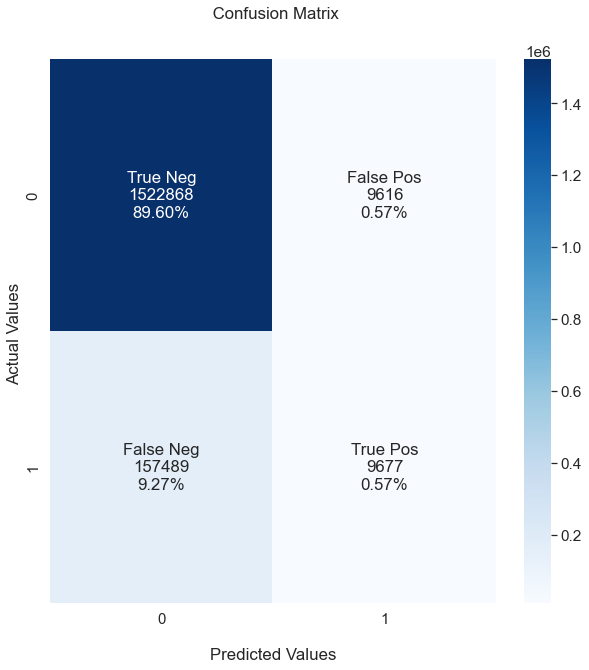

Matriz de confusion para la claseind_ctju_fin_ult1


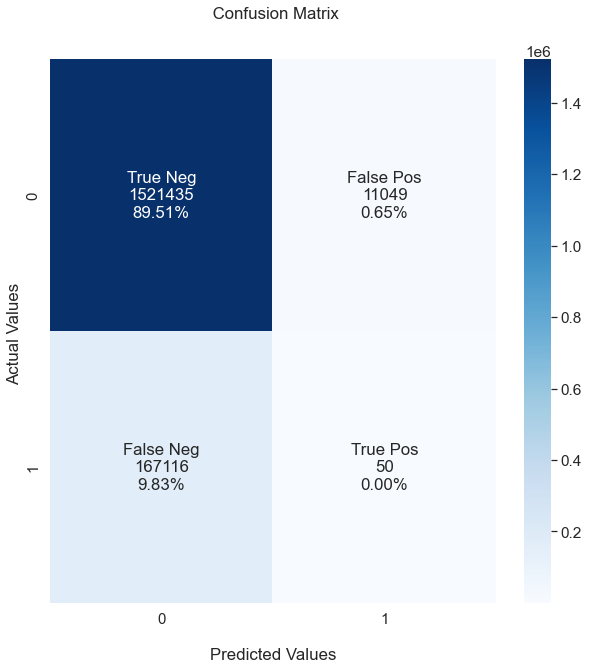

Matriz de confusion para la claseind_ctma_fin_ult1


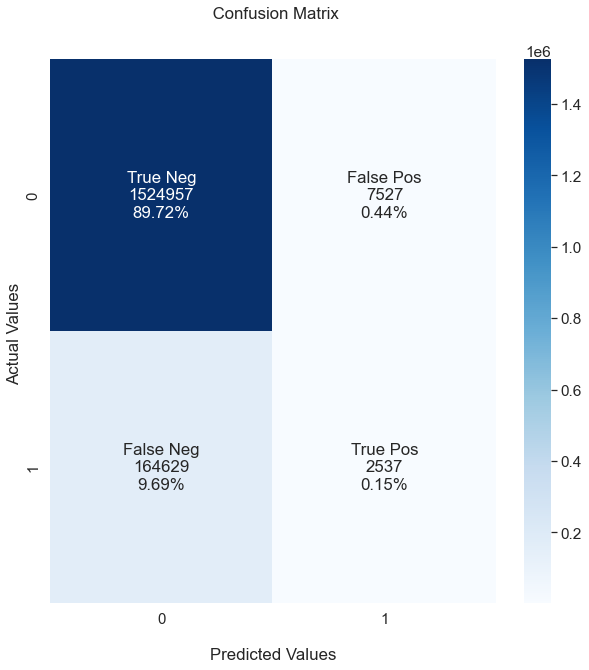

Matriz de confusion para la claseind_ctop_fin_ult1


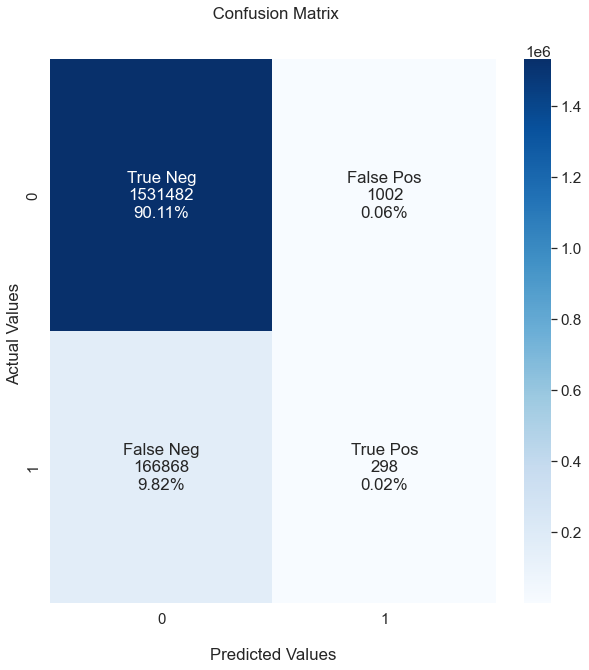

Matriz de confusion para la claseind_ctpp_fin_ult1


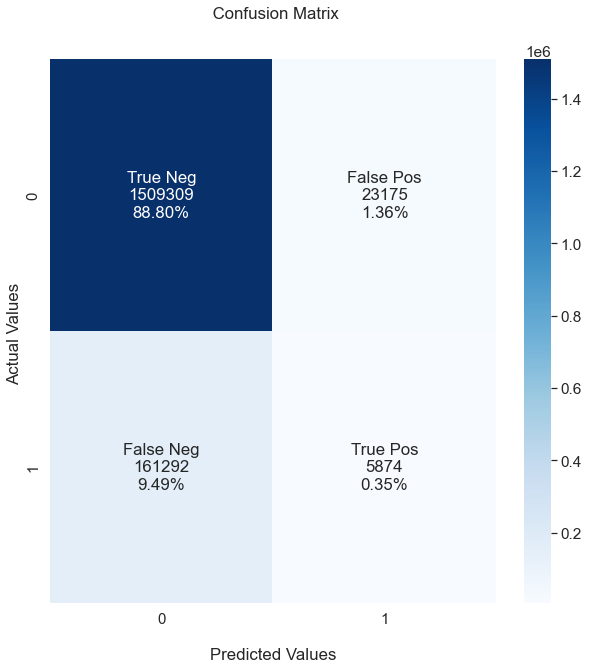

Matriz de confusion para la claseind_deco_fin_ult1


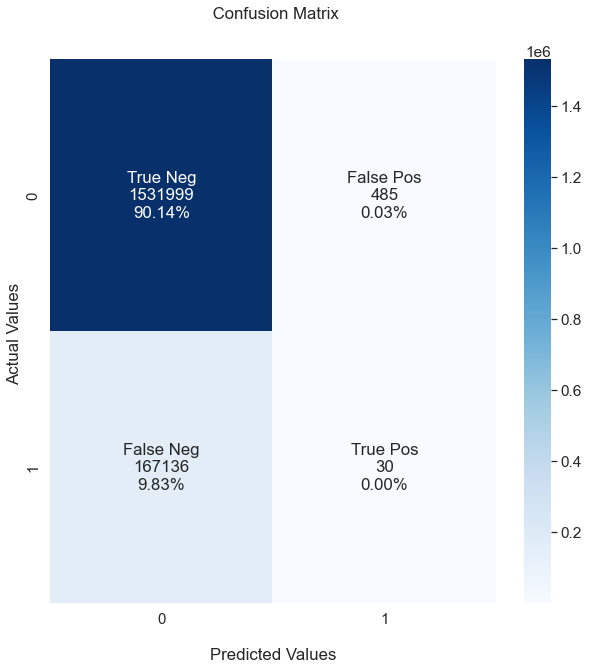

Matriz de confusion para la claseind_deme_fin_ult1


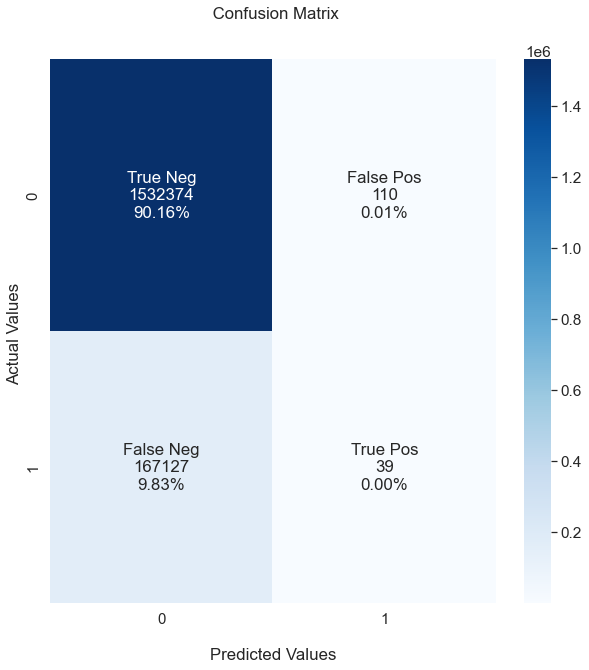

Matriz de confusion para la claseind_dela_fin_ult1


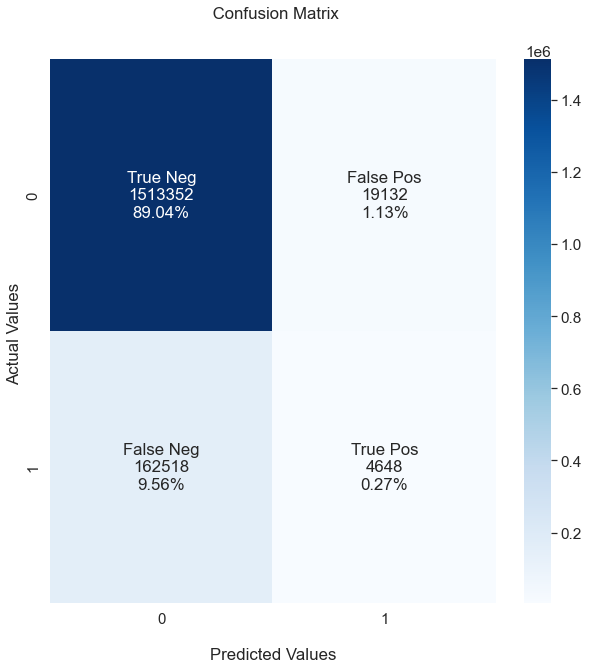

Matriz de confusion para la claseind_ecue_fin_ult1


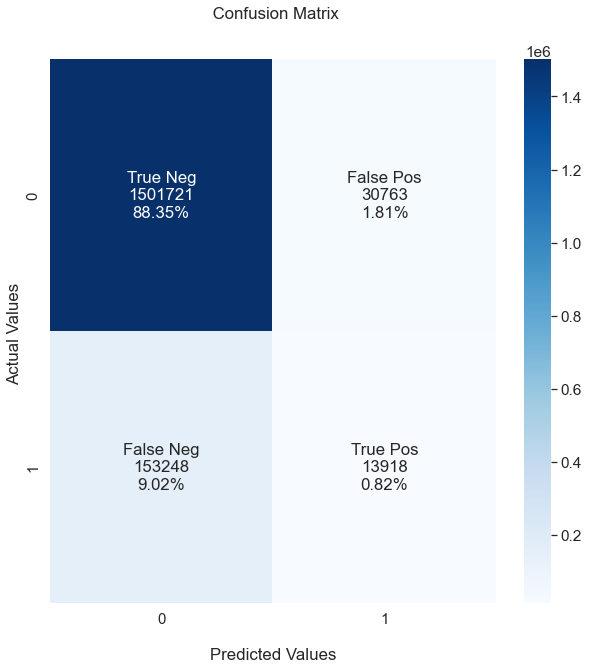

Matriz de confusion para la claseind_fond_fin_ult1


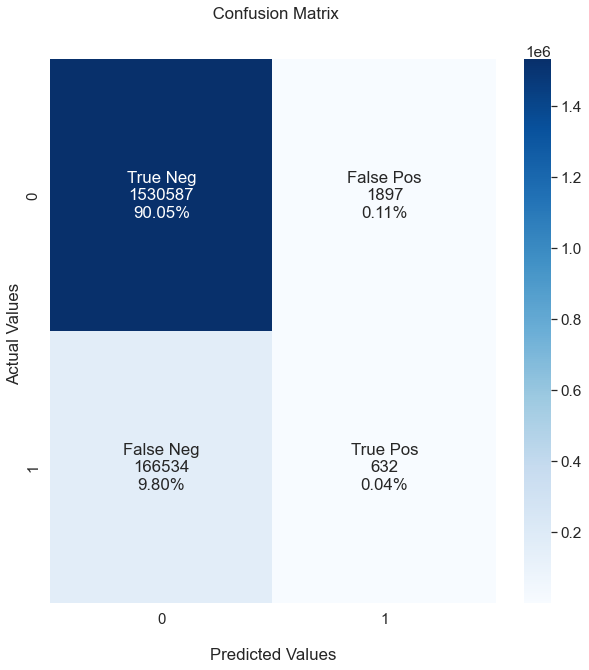

Matriz de confusion para la claseind_hip_fin_ult1


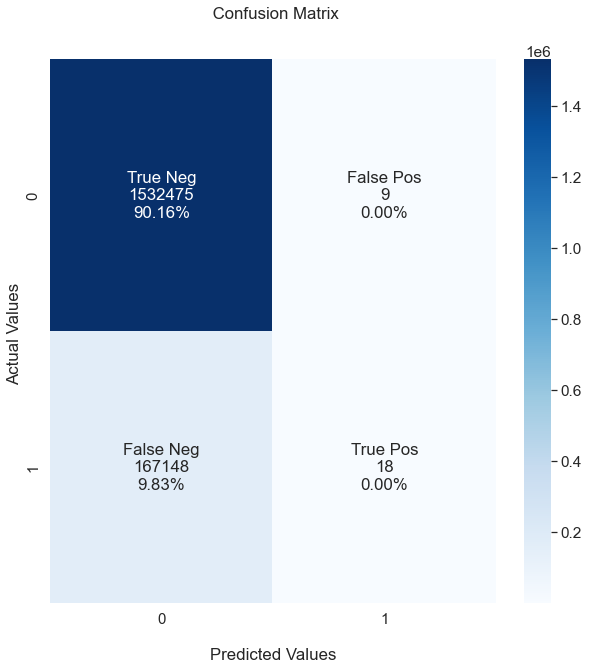

Matriz de confusion para la claseind_plan_fin_ult1


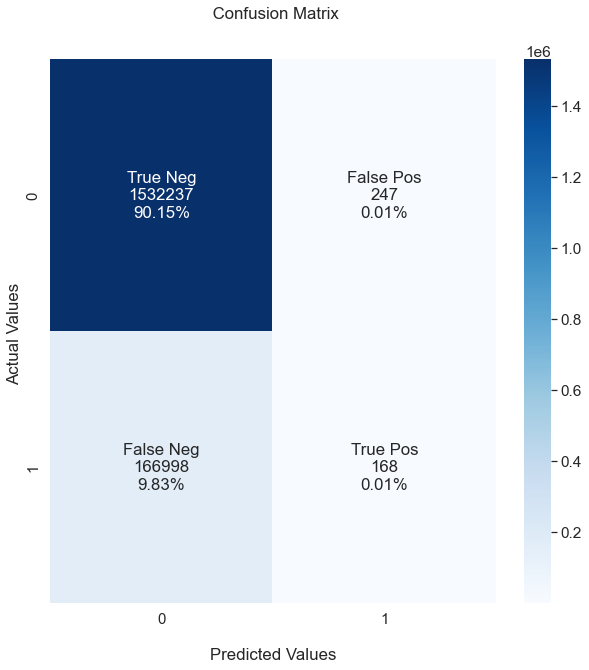

Matriz de confusion para la claseind_pres_fin_ult1


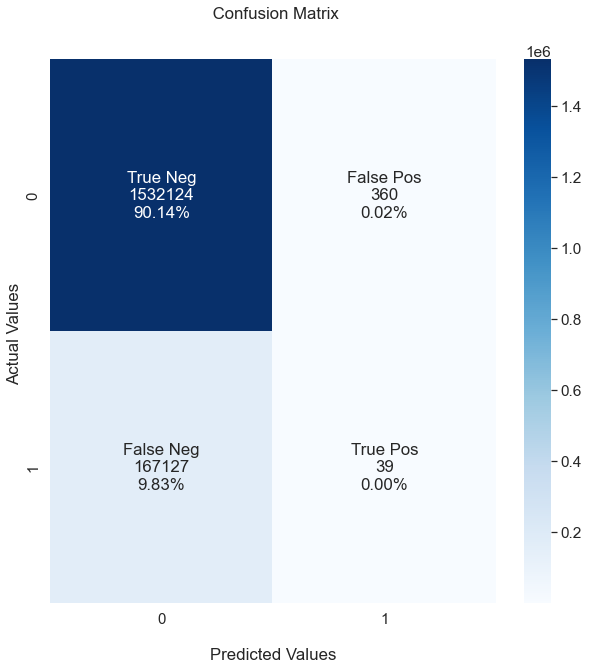

Matriz de confusion para la claseind_reca_fin_ult1


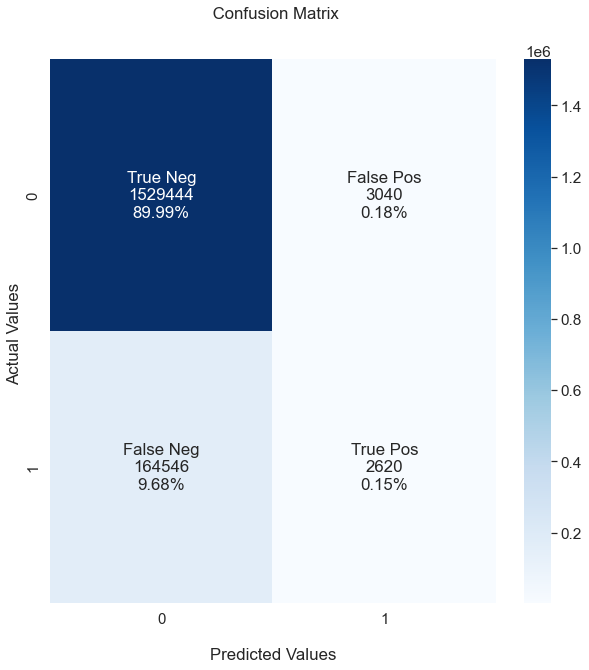

Matriz de confusion para la claseind_tjcr_fin_ult1


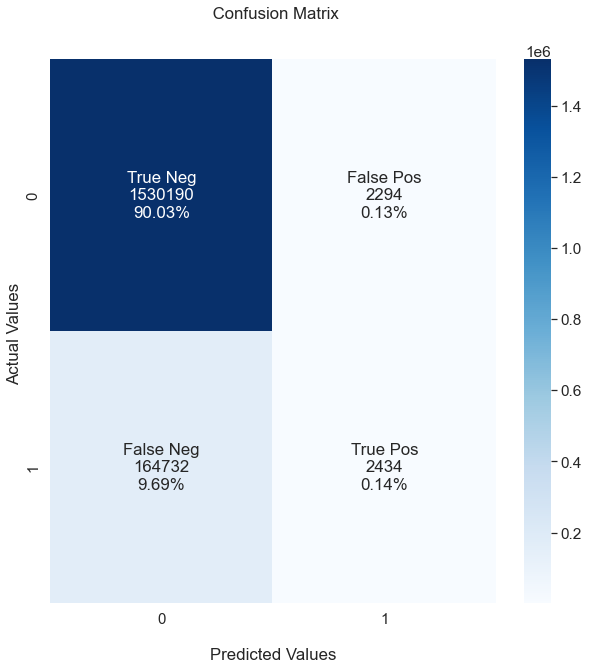

Matriz de confusion para la claseind_valo_fin_ult1


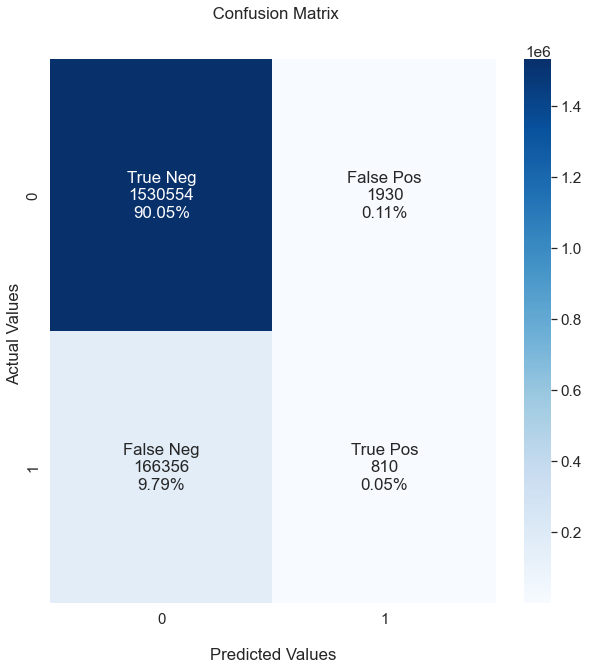

Matriz de confusion para la claseind_viv_fin_ult1


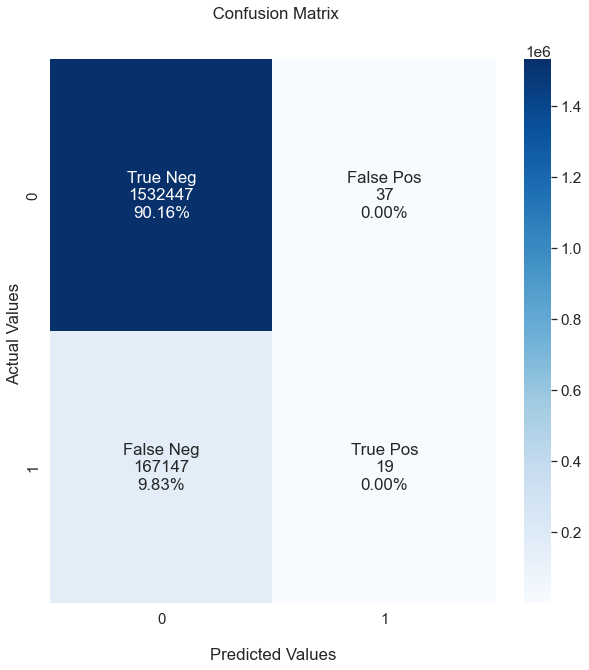

Matriz de confusion para la claseind_nomina_ult1


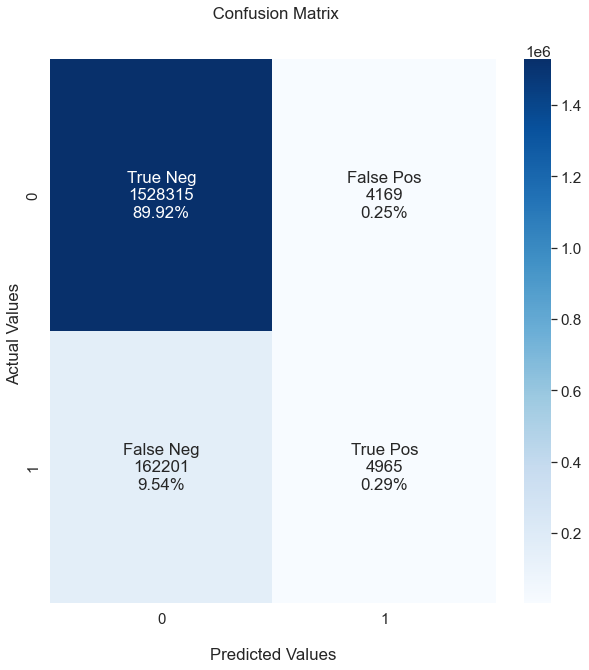

Matriz de confusion para la claseind_nom_pens_ult1


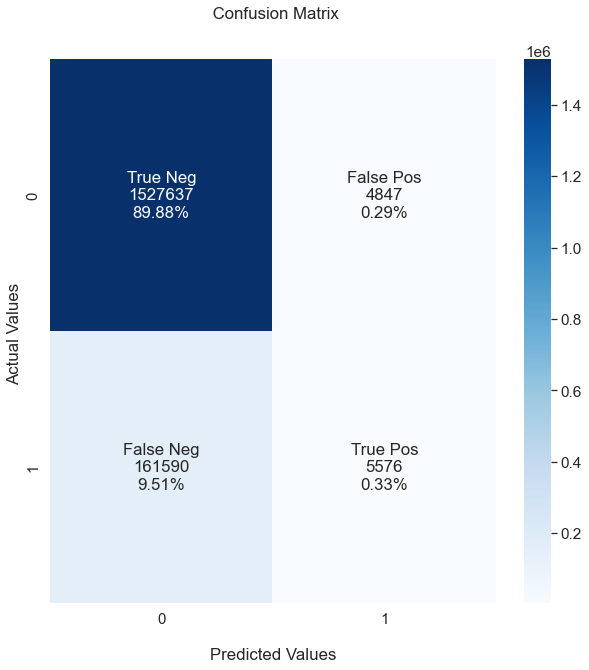

Matriz de confusion para la claseind_recibo_ult1


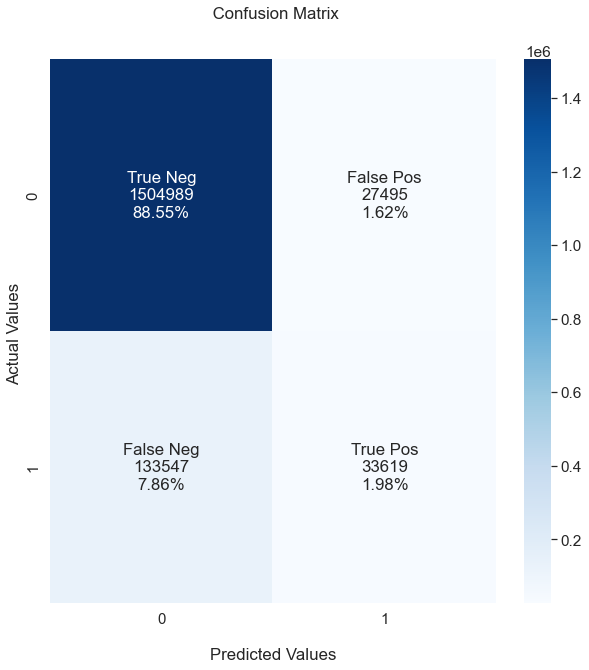

In [55]:

    
import seaborn as sns
from sklearn.metrics import confusion_matrix

for i in range(len(col_productos)):
    #Generate the confusion matrix
    print("Matriz de confusion para la clase" + col_productos[i] )     

    cf_matrix = confusion_matrix(columna_y_test, modelos_preds[col_productos[i]])

    #print(cf_matrix)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    fig, ax = plt.subplots(figsize=(10,10))  
    sns.set(font_scale=1.4)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title(' Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - 
    ax.xaxis.set_ticklabels(['0','1'],fontsize = 15)
    ax.yaxis.set_ticklabels(['0','1'],fontsize = 15)

    ## Display the visualization of the Confusion Matrix.
    plt.show()